In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.decomposition import PCA

In [56]:
# Load the data
data = pd.read_csv('../resources/data_sdss.csv')
data.head()

objid         ra       dec         u         g         r  \
0  1237676302409728169  70.897791 -7.046481  20.26207  18.98241  18.40066   
1  1237676302409793775  70.982693 -6.875443  20.83626  19.27628  18.46186   
2  1237676302409859250  71.122745 -6.935282  20.31286  19.05241  18.86574   
3  1237676302409859327  71.046302 -6.894465  20.88652  19.97834  19.62850   
4  1237676302409859452  71.107683 -7.027117  20.08399  19.96288  20.30138   

          i         z   run  rerun  ...  modelFlux_g  modelFlux_r  \
0  18.12477  18.04322  7178    301  ...     25.52884    43.624580   
1  18.11941  17.91683  7178    301  ...     19.47510    41.233770   
2  18.76263  18.74784  7178    301  ...     23.93480    28.424820   
3  19.37672  19.33097  7178    301  ...     10.20069    14.078840   
4  20.43546  20.52033  7178    301  ...     10.34699     7.574255   

   modelFlux_i  modelFlux_z            specobjid  class  redshift  plate  \
0    56.245480    60.624390  3312454501507557376   STAR  0.000824   2942   
1    56.523850    68.111130  3312457800042440704   STAR  0.000116   2942   
2    31.255950    31.668570  3312452852240115712   STAR  0.000454   2942   
3    17.752780    18.489120  3312458074920347648   STAR  0.000016   2942   
4     6.691143     6.104117  3312455326141278208   STAR -0.000112   2942   

     mjd  fiberid  
0  54521      207  
1  54521      219  
2  54521      201  
3  54521      220  
4  54521      210  

[5 rows x 23 columns]

In [57]:
data.describe()

objid             ra            dec              u  \
count  5.000000e+05  500000.000000  500000.000000  500000.000000   
mean   1.237665e+18     157.041133      21.733104      21.836999   
std    8.317876e+12     101.681940      19.596665      56.737171   
min    1.237650e+18       0.000464     -11.241591   -9999.000000   
25%    1.237660e+18      49.481773       3.391014      20.201615   
50%    1.237664e+18     162.432338      22.664959      22.450830   
75%    1.237669e+18     211.180766      34.459235      23.908010   
max    1.237681e+18     359.998704      84.221075      31.475460   

                   g              r              i              z  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean       20.346590      19.253018      18.470464      18.260552   
std        42.566563      37.536372      53.038040      37.522237   
min     -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%        18.560318      17.694418      17.285407      17.015497   
50%        21.040390      19.697010      18.996600      18.608295   
75%        22.278320      20.910872      19.986250      19.529592   
max        32.149970      31.990100      32.101780      30.017040   

                 run     rerun  ...    modelFlux_u    modelFlux_g  \
count  500000.000000  500000.0  ...  500000.000000  500000.000000   
mean     4567.960388     301.0  ...      12.471062      46.863285   
std      1936.657424       0.0  ...     214.226956     384.449280   
min       994.000000     301.0  ...     -76.284930     -58.677440   
25%      3367.000000     301.0  ...       0.201655       1.219842   
50%      4335.000000     301.0  ...       1.027429       3.833166   
75%      5362.000000     301.0  ...       8.301436      37.655223   
max      8157.000000     301.0  ...  105492.900000   96845.410000   

         modelFlux_r    modelFlux_i   modelFlux_z     specobjid  \
count  500000.000000  500000.000000  5.000000e+05  5.000000e+05   
mean       93.266290     131.494584  1.643316e+02  5.349399e+18   
std       854.509133    1137.953214  1.926129e+03  3.296621e+18   
min       -90.033160    -224.520000 -5.562592e+02  3.208944e+17   
25%         4.317705      10.123227  1.538636e+01  2.284605e+18   
50%        13.216280      25.192825  3.601407e+01  5.201674e+18   
75%        83.602630     121.837325  1.562310e+02  7.686593e+18   
max    215273.000000  299233.900000  1.222679e+06  1.317780e+19   

            redshift          plate            mjd        fiberid  
count  500000.000000  500000.000000  500000.000000  500000.000000  
mean        0.308527    4751.119234   55339.680578     416.807578  
std         0.301834    2927.968059    1853.320868     270.307813  
min        -0.011219     285.000000   51609.000000       1.000000  
25%         0.000203    2029.000000   53735.000000     189.000000  
50%         0.226605    4620.000000   55704.000000     385.000000  
75%         0.544987    6827.000000   56565.000000     611.000000  
max         2.002617   11704.000000   58543.000000    1000.000000  

[8 rows x 22 columns]

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        500000 non-null  int64  
 1   ra           500000 non-null  float64
 2   dec          500000 non-null  float64
 3   u            500000 non-null  float64
 4   g            500000 non-null  float64
 5   r            500000 non-null  float64
 6   i            500000 non-null  float64
 7   z            500000 non-null  float64
 8   run          500000 non-null  int64  
 9   rerun        500000 non-null  int64  
 10  camcol       500000 non-null  int64  
 11  field        500000 non-null  int64  
 12  modelFlux_u  500000 non-null  float64
 13  modelFlux_g  500000 non-null  float64
 14  modelFlux_r  500000 non-null  float64
 15  modelFlux_i  500000 non-null  float64
 16  modelFlux_z  500000 non-null  float64
 17  specobjid    500000 non-null  uint64 
 18  class        500000 non-

In [59]:
# keep only ra, dec, u, g, r, u, z, class and redshift columns
data_model = data[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift']]
data_model.head()

ra       dec         u         g         r         i         z  \
0  70.897791 -7.046481  20.26207  18.98241  18.40066  18.12477  18.04322   
1  70.982693 -6.875443  20.83626  19.27628  18.46186  18.11941  17.91683   
2  71.122745 -6.935282  20.31286  19.05241  18.86574  18.76263  18.74784   
3  71.046302 -6.894465  20.88652  19.97834  19.62850  19.37672  19.33097   
4  71.107683 -7.027117  20.08399  19.96288  20.30138  20.43546  20.52033   

  class  redshift  
0  STAR  0.000824  
1  STAR  0.000116  
2  STAR  0.000454  
3  STAR  0.000016  
4  STAR -0.000112

In [60]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ra        500000 non-null  float64
 1   dec       500000 non-null  float64
 2   u         500000 non-null  float64
 3   g         500000 non-null  float64
 4   r         500000 non-null  float64
 5   i         500000 non-null  float64
 6   z         500000 non-null  float64
 7   class     500000 non-null  object 
 8   redshift  500000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 34.3+ MB


In [61]:
data_model.describe()

ra            dec              u              g  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean      157.041133      21.733104      21.836999      20.346590   
std       101.681940      19.596665      56.737171      42.566563   
min         0.000464     -11.241591   -9999.000000   -9999.000000   
25%        49.481773       3.391014      20.201615      18.560318   
50%       162.432338      22.664959      22.450830      21.040390   
75%       211.180766      34.459235      23.908010      22.278320   
max       359.998704      84.221075      31.475460      32.149970   

                   r              i              z       redshift  
count  500000.000000  500000.000000  500000.000000  500000.000000  
mean       19.253018      18.470464      18.260552       0.308527  
std        37.536372      53.038040      37.522237       0.301834  
min     -9999.000000   -9999.000000   -9999.000000      -0.011219  
25%        17.694418      17.285407      17.015497       0.000203  
50%        19.697010      18.996600      18.608295       0.226605  
75%        20.910872      19.986250      19.529592       0.544987  
max        31.990100      32.101780      30.017040       2.002617

# Data Cleaning

In [62]:
data_model['class'] = data_model['class'].map({'GALAXY':0, 'STAR':1})

clf = LocalOutlierFactor()
clf.fit_predict(data_model)
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#filter for dropping                                           
filter2 = outlier_score["score"] < -1.5
outlier_index = outlier_score[filter2].index.tolist()
data_model = data_model.drop(outlier_index, inplace=False)
data_model['class'] = data_model['class'].map({0:'GALAXY', 1:'STAR'})

C:\Users\aleksa.toroman\AppData\Local\Temp\ipykernel_22092\1377014104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['class'] = data_model['class'].map({'GALAXY':0, 'STAR':1})


In [63]:
data_model.describe()

ra            dec              u              g  \
count  492153.000000  492153.000000  492153.000000  492153.000000   
mean      156.884300      21.752059      22.156484      20.520144   
std       101.687495      19.587729       2.363537       2.194855   
min         0.000464     -11.241591      12.055210      10.487280   
25%        49.159440       3.437514      20.202210      18.558580   
50%       162.372542      22.714609      22.446720      21.039360   
75%       211.034336      34.462908      23.893790      22.271070   
max       359.998704      84.221075      28.405650      27.467450   

                   r              i              z       redshift  
count  492153.000000  492153.000000  492153.000000  492153.000000  
mean       19.384453      18.745129      18.392884       0.310627  
std         1.938050       1.757989       1.724364       0.300718  
min         9.432361       8.809973       9.701558      -0.011219  
25%        17.693200      17.284070      17.014670       0.000238  
50%        19.689000      18.991330      18.606210       0.235375  
75%        20.898850      19.976680      19.519890       0.546242  
max        25.346950      24.726670      24.333020       2.002617

# Data Visualization

In [64]:
sns.set_context("paper", rc={"font.size":10,
                             "axes.titlesize":15,
                             "axes.labelsize":12,
                             "xtick.labelsize":10,
                             "ytick.labelsize":10,
                             "legend.fontsize":15})

palette = {'GALAXY':'#4daf4a',
           'STAR':'#ff7f00'}

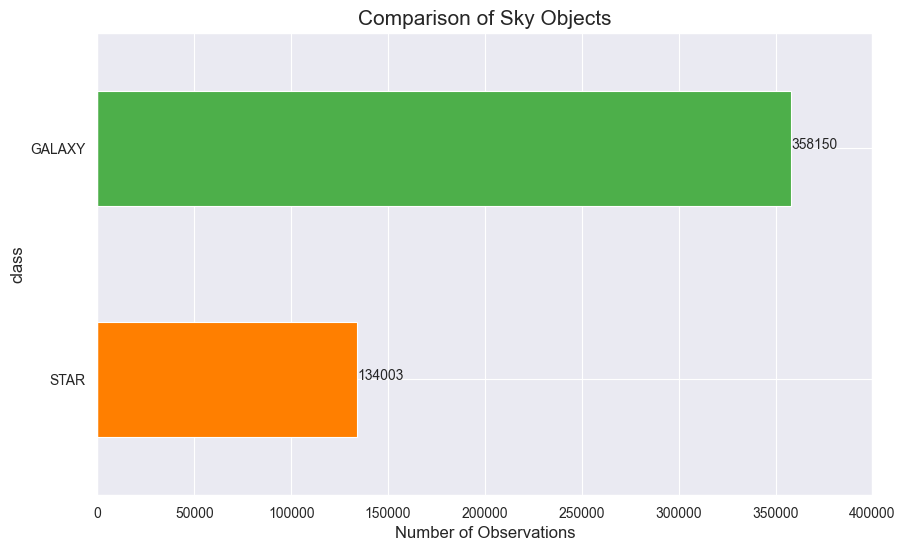

In [65]:
labels = [data_model['class'].value_counts().iloc[0],
          data_model['class'].value_counts().iloc[1]]

plt.figure(figsize=(10, 6))
data_model['class'].value_counts().plot(kind='barh', title='Comparison of Sky Objects',
                                        color=['#4daf4a', '#ff7f00', '#377eb8']).invert_yaxis()
plt.xlabel('Number of Observations')
plt.xlim(0, 400000)

for index, value in enumerate(labels):
    plt.text(value, index, str(value))

plt.show()

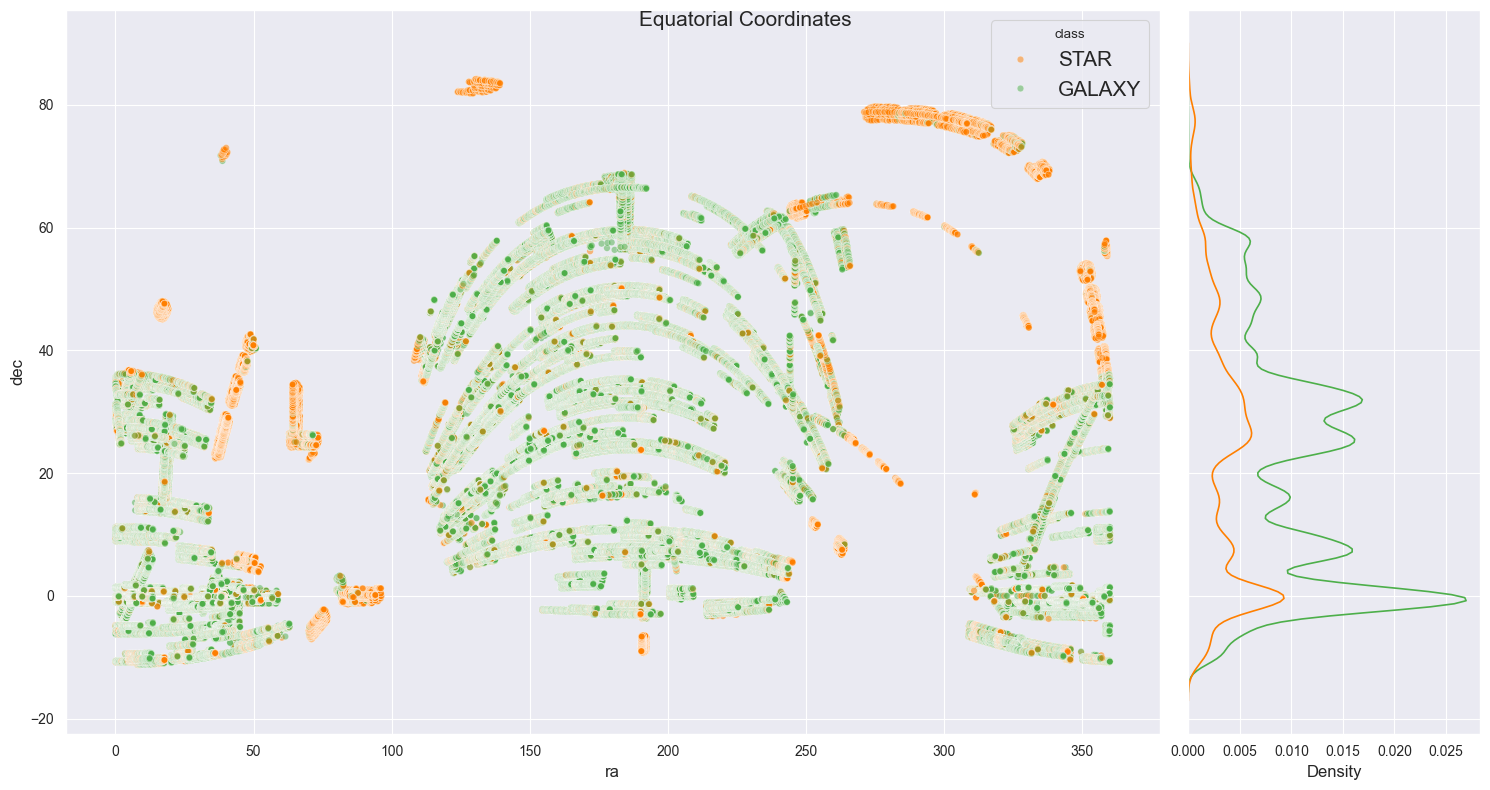

In [66]:
f, axs = plt.subplots(1,2,
                      figsize=(15,8),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[3,0.8]))
sns.scatterplot(x = 'ra',y = 'dec', hue = 'class', data = data_model, ax = axs[0], palette = palette, alpha = 0.5)
sns.kdeplot(y = 'dec', hue = 'class', data = data_model, ax = axs[1], palette = palette, legend = False)
f.tight_layout()

plt.suptitle('Equatorial Coordinates', fontsize = 15);

In [67]:
def get_hists(feature_name):
    if feature_name == 'redshift':
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
    else:
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5), sharex = True)
    
    ax = sns.histplot(data_model[data_model['class']=='GALAXY'][feature_name], bins = 30, ax = axes[0], 
                      color = '#4daf4a', kde = False)
    ax.set_title('Galaxy')
    ax = sns.histplot(data_model[data_model['class']=='STAR'][feature_name], bins = 30, ax = axes[1], 
                      color = '#ff7f00', kde = False)
    ax.set_title('Star')
    fig.suptitle(feature_name.upper(), fontsize = 15)
    fig.tight_layout(pad = 0.5)

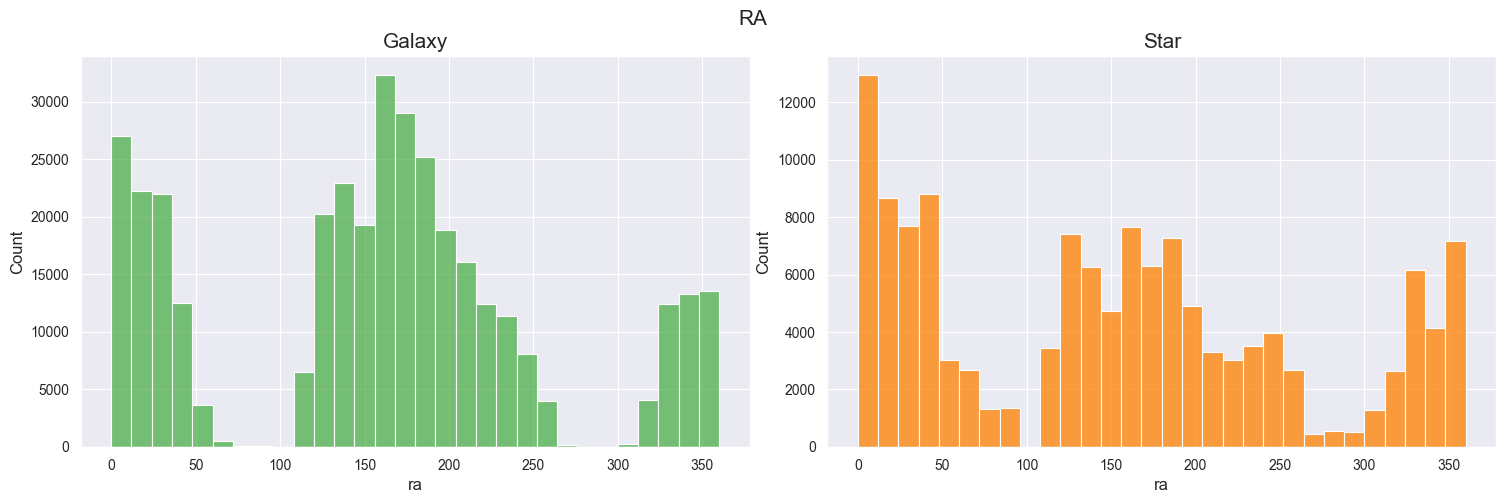

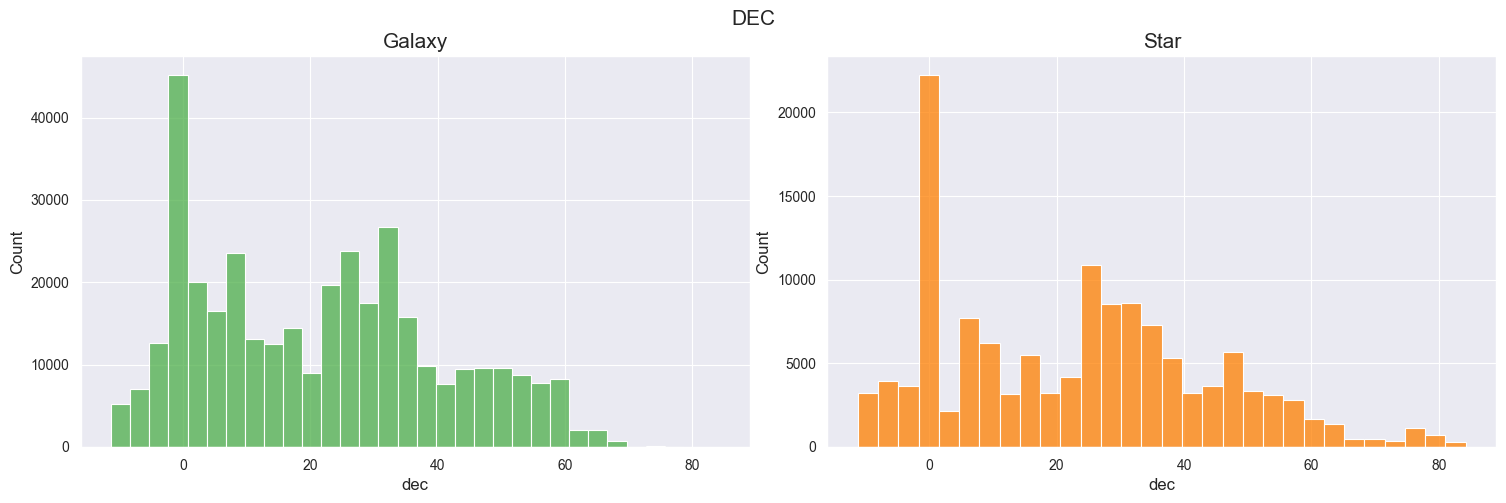

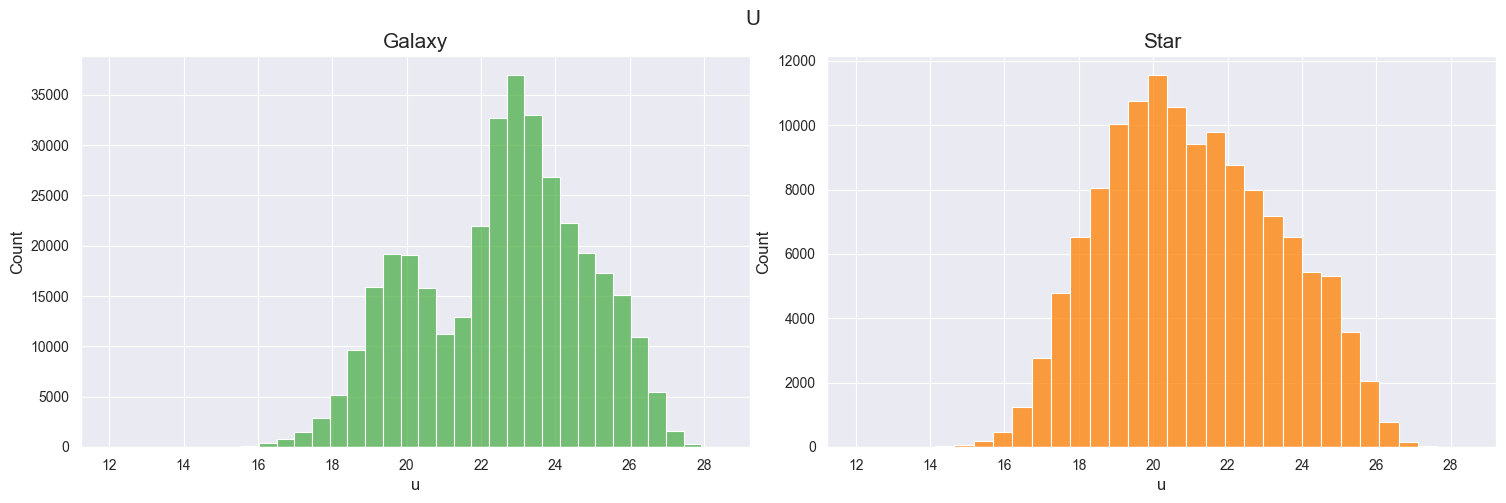

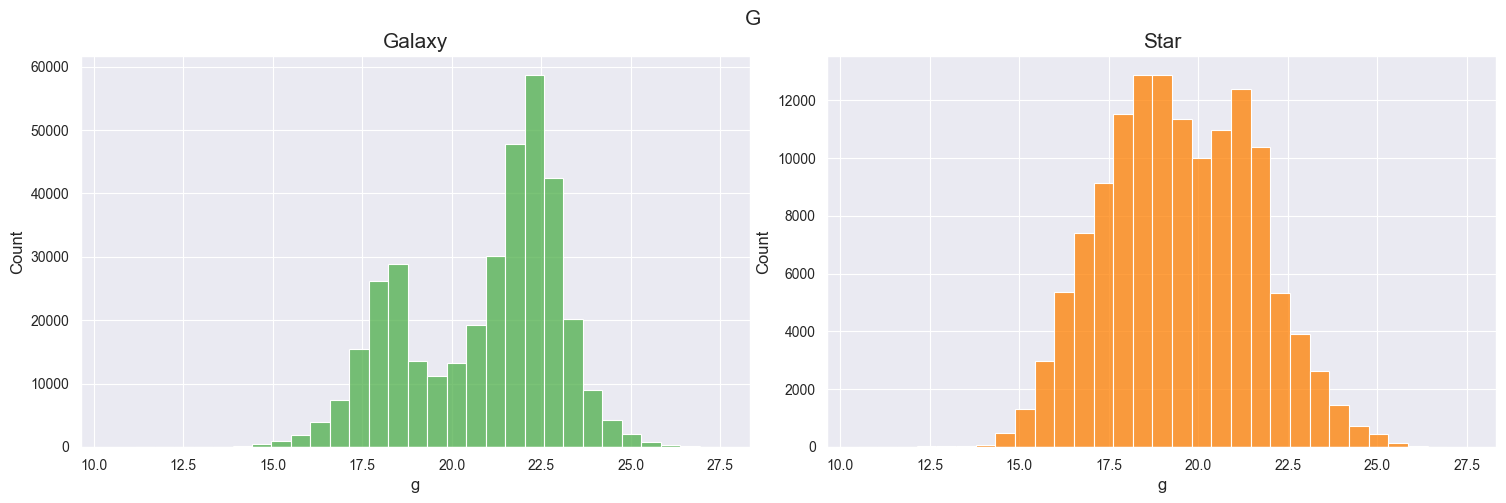

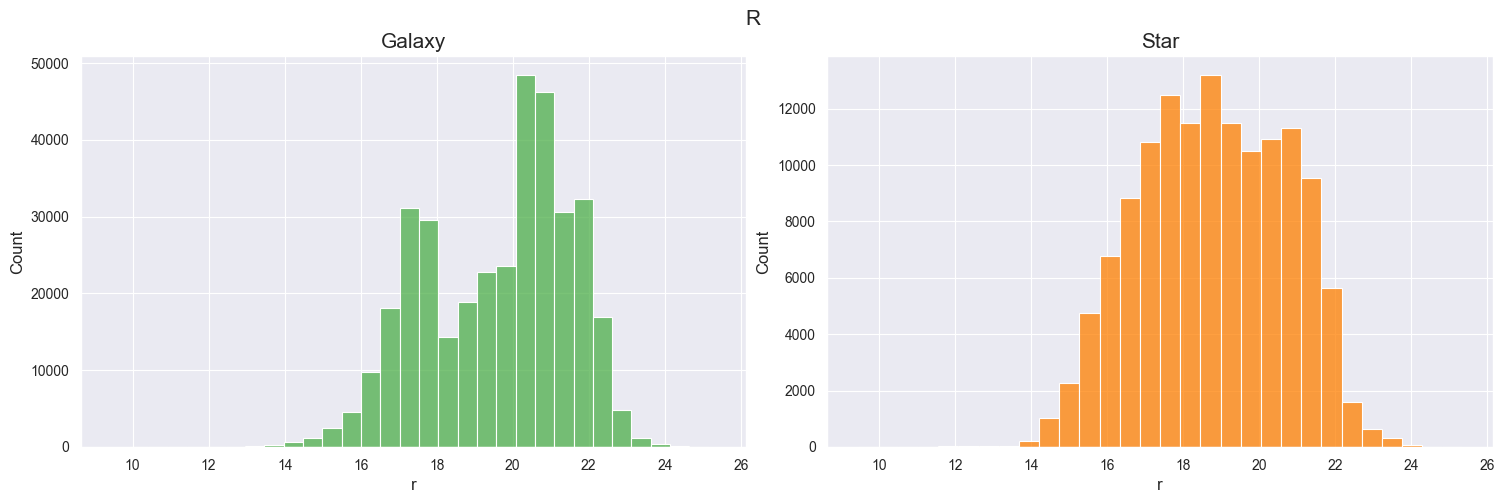

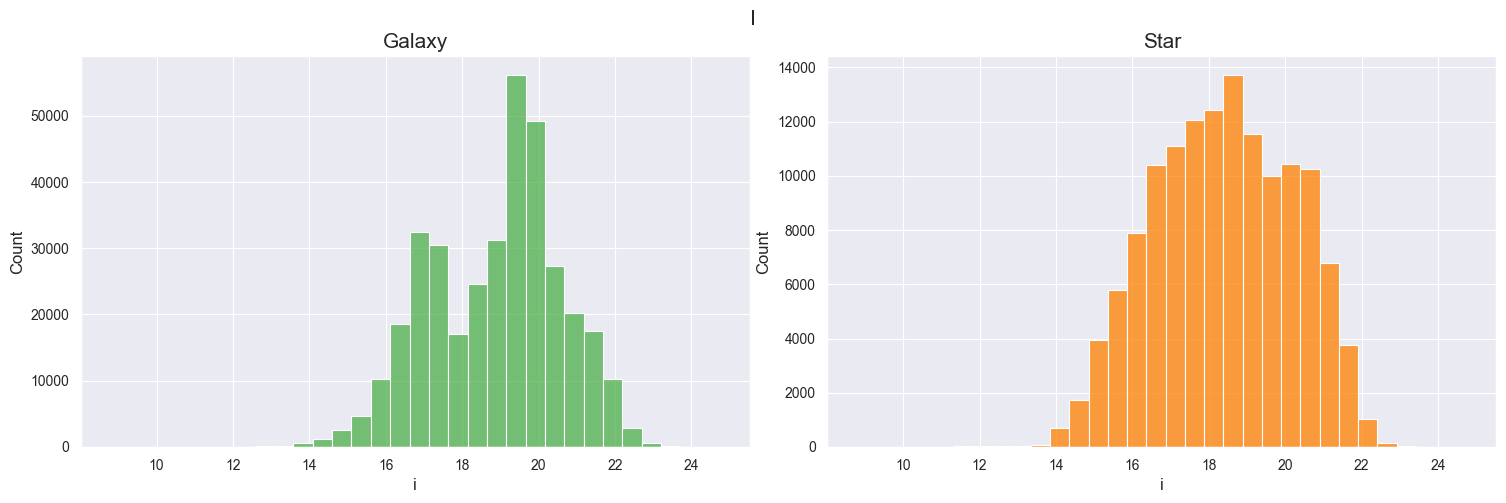

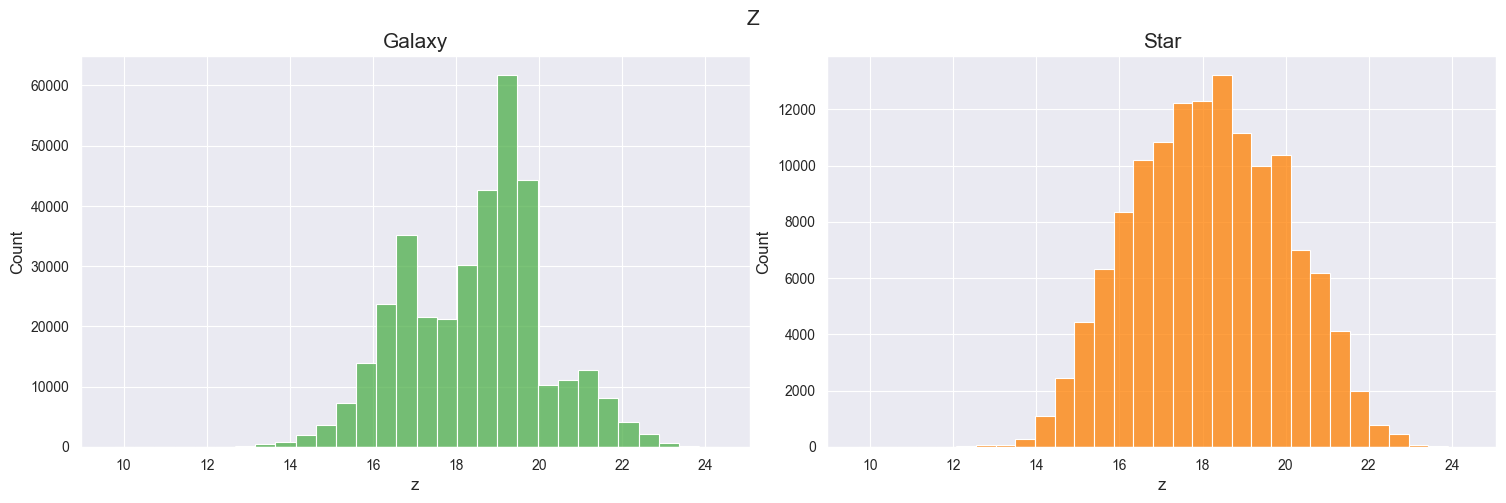

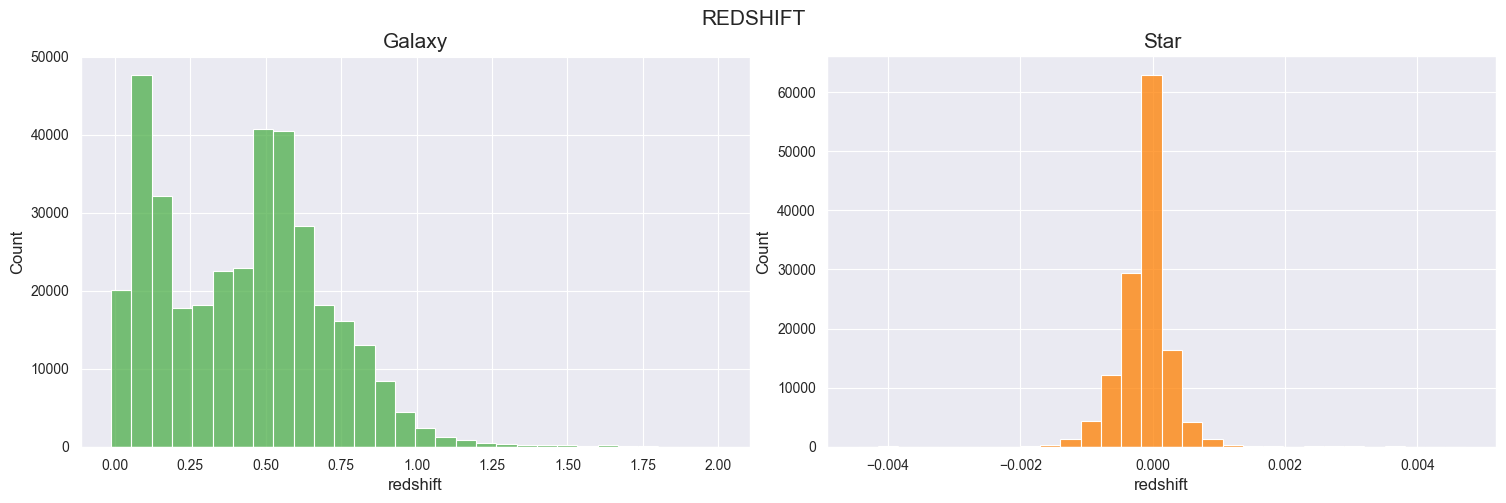

In [68]:
columns = list(data_model.drop(['class'], axis = 1).columns)
for name in columns:
    get_hists(name)

# Correlation matrix

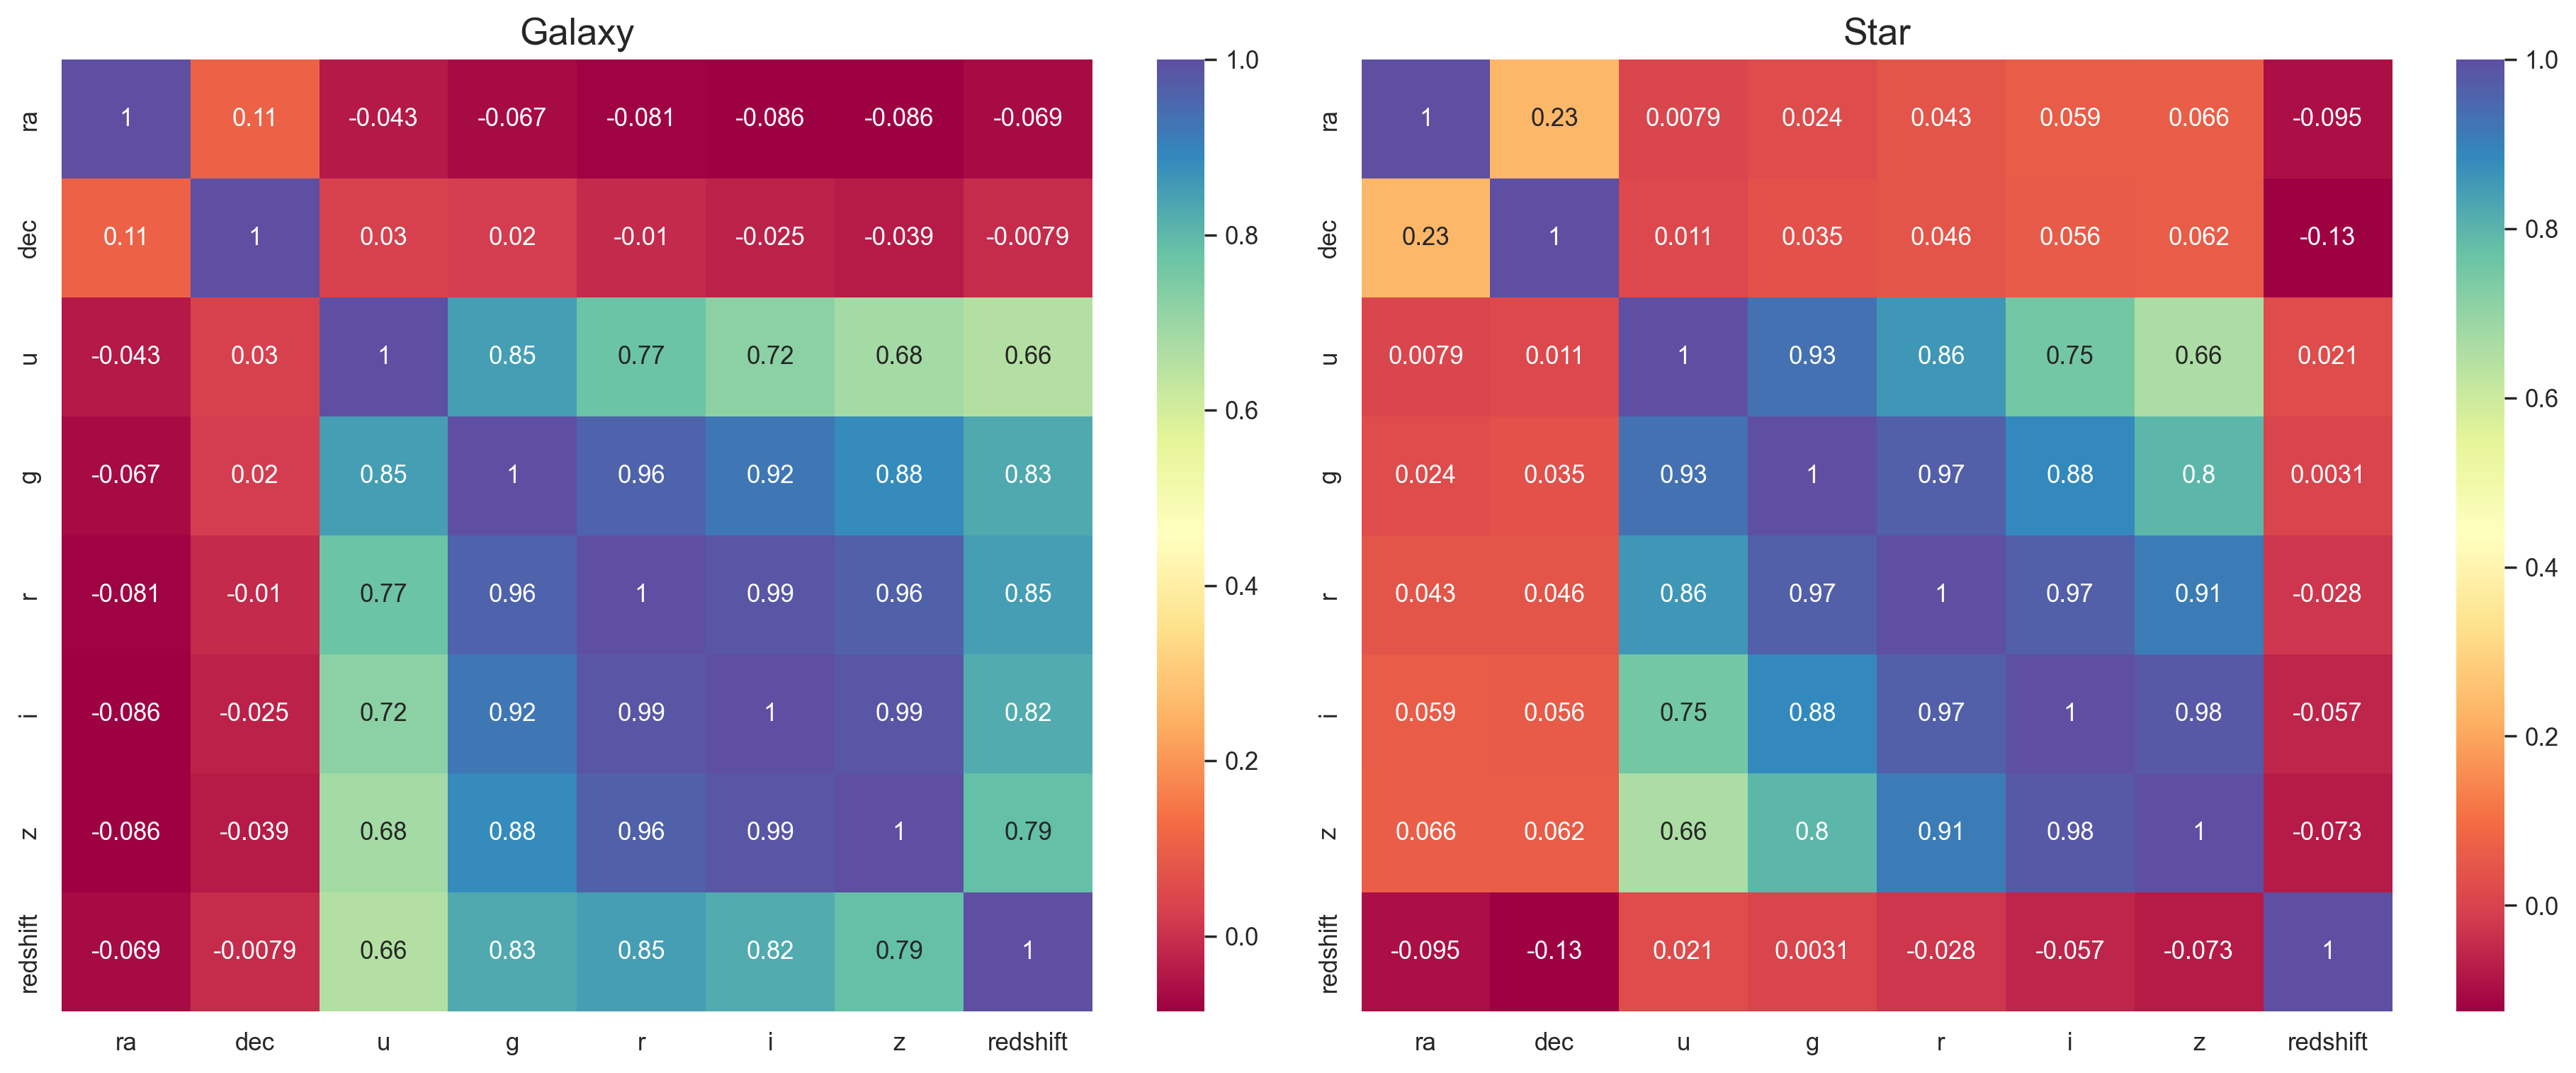

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
fig.set_dpi(250)
ax = sns.heatmap(data_model[data_model['class']=='GALAXY'][
    ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']].corr(), ax = axes[0], cmap='Spectral', annot=True)
ax.set_title('Galaxy')
ax = sns.heatmap(data_model[data_model['class']=='STAR'][
    ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']].corr(), ax = axes[1], cmap='Spectral', annot=True)
ax.set_title('Star')
fig.tight_layout(pad = 0.5);

### Pair Plot

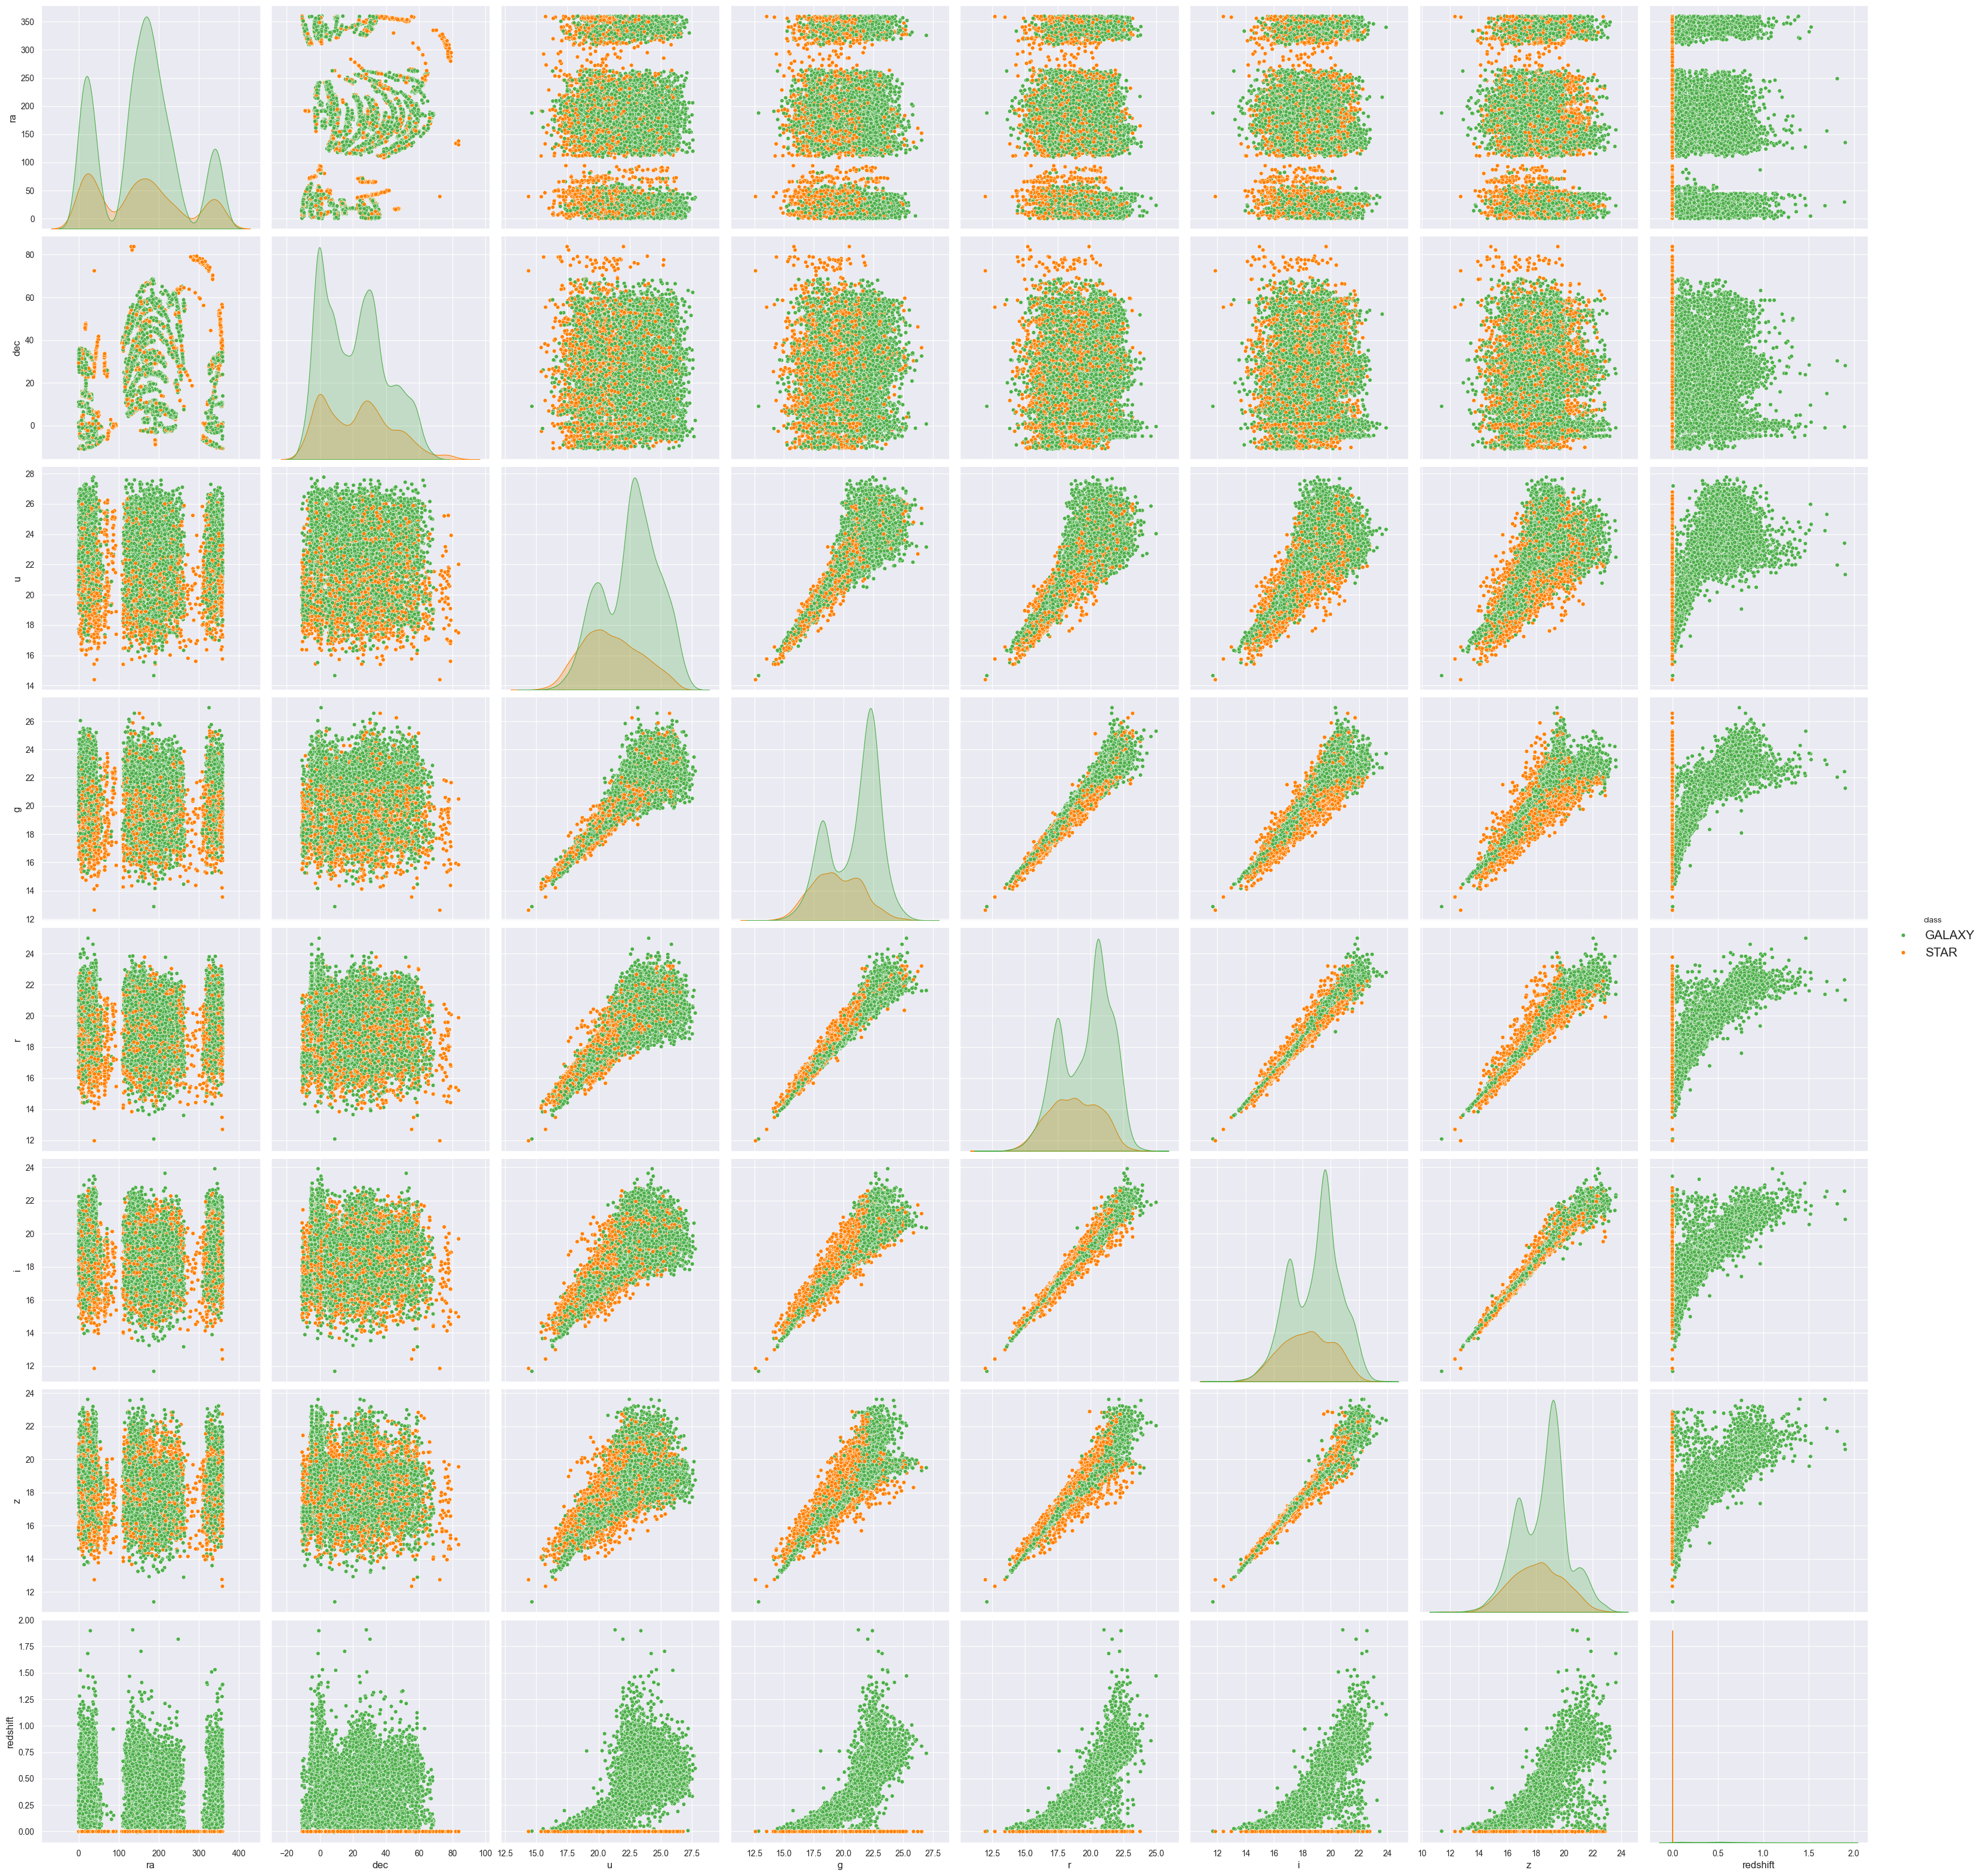

In [70]:
sns.pairplot(data_model.sample(10000), hue = 'class', height = 4, palette = palette);

# Logistic Regression Model

In [71]:
data_model.head()

ra       dec         u         g         r         i         z  \
0  70.897791 -7.046481  20.26207  18.98241  18.40066  18.12477  18.04322   
1  70.982693 -6.875443  20.83626  19.27628  18.46186  18.11941  17.91683   
2  71.122745 -6.935282  20.31286  19.05241  18.86574  18.76263  18.74784   
3  71.046302 -6.894465  20.88652  19.97834  19.62850  19.37672  19.33097   
4  71.107683 -7.027117  20.08399  19.96288  20.30138  20.43546  20.52033   

  class  redshift  
0  STAR  0.000824  
1  STAR  0.000116  
2  STAR  0.000454  
3  STAR  0.000016  
4  STAR -0.000112

In [72]:
X = data_model.drop(['class'], axis = 1)
y = data_model['class']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2024, stratify=y_train)

In [74]:
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
X_val_scaled = std_scale.transform(X_val)
X_test_scaled = std_scale.transform(X_test)

In [75]:
def plot_confusion(model_name, model, x_values, actual_values):
    labels = ['GALAXY', 'STAR']
    # Predict the values using the model
    predicted_values = model.predict(x_values)
    
    # Compute the confusion matrix
    confusion = confusion_matrix(actual_values, predicted_values, labels=labels)
    
    # Plot the confusion matrix
    plt.figure(dpi=150)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, fmt='g',
                square=True, xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.title(f'{model_name} Confusion Matrix', fontsize=12)
    plt.show()


In [92]:
linreg = LogisticRegression()

logreg_baseline = LogisticRegression(solver='lbfgs')

# Setup repeated stratified k-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation
n_scores = cross_val_score(logreg_baseline, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

logreg_baseline.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
test_accuracy = logreg_baseline.score(X_test_scaled, y_test)
print('Test Accuracy: %.3f' % test_accuracy)

Mean Accuracy: 0.991 (0.001)
Test Accuracy: 0.991


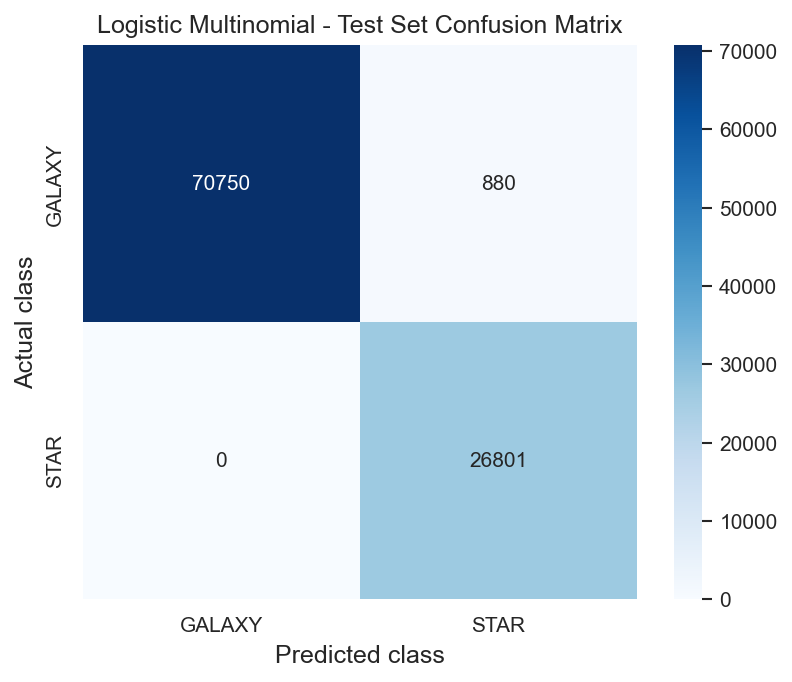

In [93]:
plot_confusion('Logistic Multinomial - Test Set',logreg_baseline, X_test_scaled, y_test)

In [94]:
y_pred = logreg_baseline.predict(X_test_scaled)
print('Logistic Regression accuracy:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred, digits = 5))

Logistic Regression accuracy: 0.9910597271184891
              precision    recall  f1-score   support

      GALAXY    1.00000   0.98771   0.99382     71630
        STAR    0.96821   1.00000   0.98385     26801

    accuracy                        0.99106     98431
   macro avg    0.98410   0.99386   0.98883     98431
weighted avg    0.99134   0.99106   0.99110     98431



# Decision Tree Model

In [86]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_val)

print('Simple Decision Tree')
print('Simple Decision Tree accuracy:', metrics.accuracy_score(y_val, y_pred))
print(metrics.classification_report(y_val,y_pred, digits = 5))

Simple Decision Tree
Simple Decision Tree accuracy: 0.997378874541557
              precision    recall  f1-score   support

      GALAXY    0.99823   0.99817   0.99820     71630
        STAR    0.99511   0.99526   0.99519     26801

    accuracy                        0.99738     98431
   macro avg    0.99667   0.99672   0.99669     98431
weighted avg    0.99738   0.99738   0.99738     98431



In [87]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [88]:
param_grid = {
    "max_depth" : [5,10,15],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [3,4,5,6],
    "max_features": ['auto', None],
}

grid = GridSearchCV(dtree, param_grid, cv=10, scoring='f1_weighted', verbose = 2)
grid.fit(X_train, y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_fe

KeyboardInterrupt: 

In [89]:
best_dtree = DecisionTreeClassifier(max_depth=15, 
                                    min_samples_leaf=5, 
                                    min_samples_split = 4, 
                                    max_features = None)

best_dtree.fit(X_train, y_train)
y_pred = best_dtree.predict(X_val)

print('Decision Tree - Validation Set')
print('Decision Tree accuracy best params:', metrics.accuracy_score(y_val, y_pred))
print(metrics.classification_report(y_val,y_pred, digits = 5))

Decision Tree - Validation Set
Decision Tree accuracy best params: 0.9980900326116772
              precision    recall  f1-score   support

      GALAXY    0.99918   0.99820   0.99869     71630
        STAR    0.99520   0.99780   0.99650     26801

    accuracy                        0.99809     98431
   macro avg    0.99719   0.99800   0.99759     98431
weighted avg    0.99809   0.99809   0.99809     98431



In [90]:
print('Decision Tree - Test Set')
y_pred = best_dtree.predict(X_test)
print('Decision Tree accuracy best params:', metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred, digits = 5))

Decision Tree - Test Set
Decision Tree accuracy best params: 0.9982221048246995
              precision    recall  f1-score   support

      GALAXY    0.99890   0.99866   0.99878     71630
        STAR    0.99642   0.99705   0.99674     26801

    accuracy                        0.99822     98431
   macro avg    0.99766   0.99786   0.99776     98431
weighted avg    0.99822   0.99822   0.99822     98431



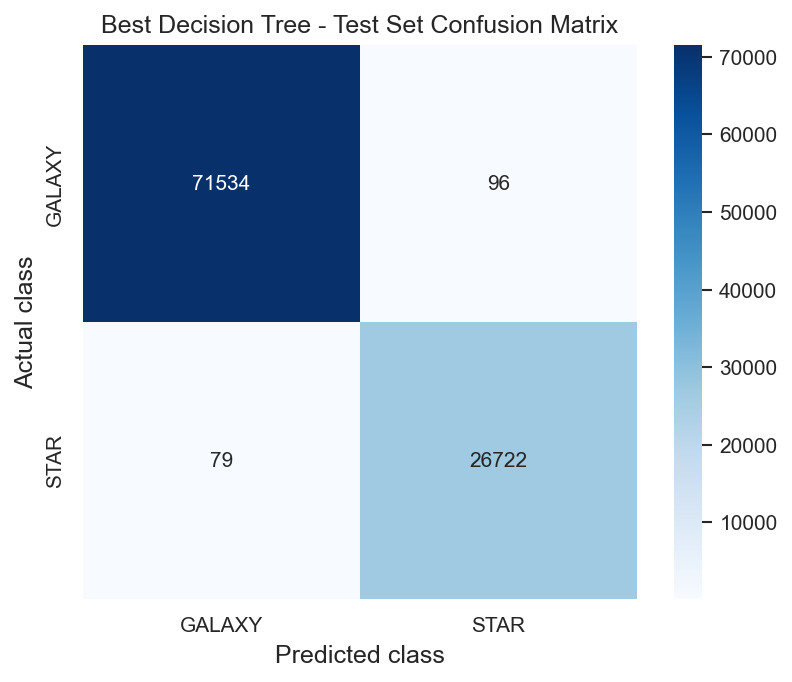

In [91]:
plot_confusion('Best Decision Tree - Test Set', best_dtree,  X_test, y_test)